# Building and Training Neural Networks with Pytorch

We have studied how to define a tensor, a function and how to take derivative of a function. In this section, we build and train a logistic regression model with MNIST dataset by using pytorch. It provides built-in functions which make it much easier to build and train neural networks. 

## Table of contents
1. [MNIST database](#MNIST)
2. [Dataset, loss, and accuracy ](#data)
3. [Build and train a logistic regression model with MNIST dataset](#logre)

<div class="alert alert-block alert-info"> <b>

### 1. MNIST database  <a name="MNIST"></a>

</b></div>

The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger NIST Special Database 3 (digits written by employees of the United States Census Bureau) and Special Database 1 (digits written by high school students) which contain monochrome images of handwritten digits. The digits have been size-normalized and centered in a fixed-size image. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

Introduced by [LeCun et al. in Gradient-based learning applied to document recognition](https://arxiv.org/pdf/1102.0183.pdf)

source: http://yann.lecun.com/exdb/mnist/ 


<div class="alert alert-block alert-info"> <b>

### 2. Dataset, loss, and accuracy  <a name="data"></a>

</b></div>

### Training dataset and test dataset
Define a dataset as $D = \{(x_j, y_j)\}$ and $D=D_1 \cup D_2$, where:
* $D_1$ is the training dataset and $|D_1|$ is the number of data in $D_1$.
* $D_2$ is the test dataset and $|D_2|$ is the number of data in $D_2$.


### Training loss and test loss
Define the loss function:
$$L(\theta) :=\frac{1}{N} \sum_{j=1}^N\ell(y_j, h(x_j; \theta)).$$
Here $\ell(y_j,h(x_j; \theta))$ is the  general distance between real label and predicted label. $h(x_j; \theta)$ is a probability distribution of data $x$.
* Training loss is defined as $L(\theta) :=\frac{1}{|D_1|} \sum_{j=1}^{|D_1|}\ell(y_j, h(x_j; \theta)).$
* Test loss is defined as $L(\theta) :=\frac{1}{|D_2|} \sum_{j=1}^{|D_2|}\ell(y_j, h(x_j; \theta)).$

### Training accuracy and test accuracy
* Training accuracy $= \frac{\text{The number of correct classifications in training dataset}}{\text{the total number of data in training dataset}}$
* Test accuracy $= \frac{\text{The number of correct classifications in test dataset}}{\text{the total number of data in test dataset}}$

Remark: We usually use the max-out method to do classification. For a given data point $x$, we first compute $h(x;\theta)$, then we attached $x$ to the class $i= \arg\max_j h_j(x; \theta)$.


### Epoch vs Batch Size vs Iterations

When the data is too big which happens all the time in machine learning and we can’t pass all the data to the machine at once. To overcome this problem we need to divide the data into smaller sizes and update the weights of the neural networks at the end of every step to fit it to the data given.


#### Epoch

One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only once. Since one epoch is too big to feed to the computer at once we divide it in several smaller batches.

#### Batch

Total number of training examples present in a single batch.

#### Iteration

Iteration is the number of batches needed to complete one epoch.


When the model goes through the whole 60k images once,learning how to classify 0-9, it's consider 1 epoch. However, there's a concept of batch size where it means the model would train with 100 images everytime. When the model updates its weights (parameters) after looking at all the images, this is considered 1 iteration. We arbitrarily set 3000 iterations here which means the model would update 3000 times. 

One epoch consists of 60,000 / 100 = 600 iterations. Because we would like to go through 3000 iterations, this implies we would have 3000 / 600 = 5 epochs as each epoch has 600 iterations.  


total data : 60000

batch size: 100 (number of examples in 1 iteration)

iterations: 3000 (one batch forward & backward pass)

epochs = iterations / (total data/ minibatch)
       = 3000/(60000/100) 
       = 5

<div class="alert alert-block alert-info"> <b>

### 3. Build and train a logistic regression model with MNIST dataset  <a name="logre"></a>

</b></div> 

We train and test a logistic regression model with MNIST dataset.This dataset contains 6000 images for training and 10000 images for testing the out-of-sample performance.

### Steps
* Step 1: Load MNIST Train and test Dataset
* Step 2: Load Dataset into DataLoader
* Step 3: Build Model with nn.Module
* Step 4: Instantiate Model Class
* Step 5: Instantiate Loss Class
* Step 6: Instantiate Optimizer Class
* Step 7: Train Model

In [4]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets

In [6]:
# Step 1: Loading MNIST Train and test Dataset
# The dataset will be downloaded and extracted to the directory
# root is the location of the data you saved
# train = True: the data loaded is training data
# download = True: if the data does not exist in root, then download it online
# transform: Transforms images to a Pytorch Tensor

# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

In [7]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


In [28]:
# This is how a single image is represented in numbers. 
# It's a 28 pixel x 28 pixel image which is why you would
# end up with this 28x28 matrix of numbers. 
print(train_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [8]:
# When you load MNIST dataset, each data point is actually a 
# tuple containing the image matrix and the label.
print("data type of a single data point in the training dataset", \
      type(train_dataset[0]))

# To inspect the data type and size of the first element in 
# the training data, you can use type() and size() methods.
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

data type of a single data point in the training dataset <class 'tuple'>
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


In [9]:
# The second element represents the image's label. 
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

label of the first taining sample:  5
label of the second taining sample:  0


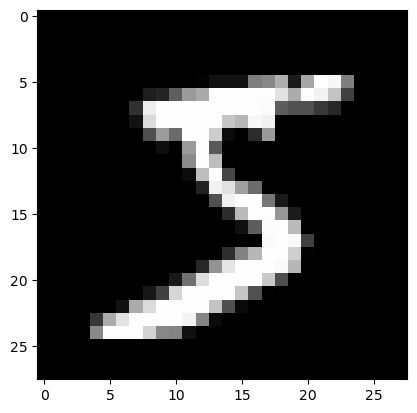

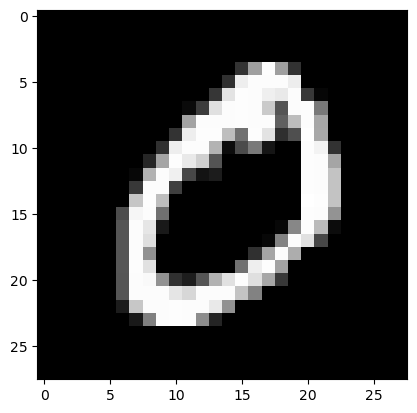

In [10]:
# first two images in the training set represent “5” and “0”. 
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()

img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()


torch.Size([32, 1, 28, 28])
torch.Size([28, 28])


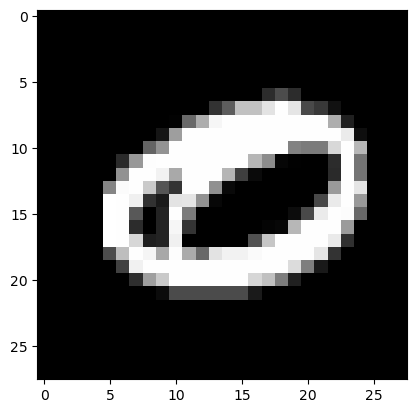

The label of the given image is tensor([0, 1, 6, 9, 3, 2, 1, 2, 7, 9, 3, 6, 4, 1, 7, 1, 3, 7, 6, 5, 3, 3, 6, 4,
        1, 0, 1, 6, 2, 7, 3, 2])


In [16]:
# Step 2: Loading Dataset into DataLoader

# Usually, you do not use the dataset directly in training 
# but through a DataLoader class. This allows you to read 
# data in batches, In the following, data is loaded into a 
# DataLoader with batch size at 32.

from torch.utils.data import DataLoader


# batch_size = 100
# n_iters = 3000
# num_epochs = n_iters / (len(train_dataset) / batch_size)
# num_epochs = int(num_epochs)
# num_epochs

batach_size = 32
train_loader = DataLoader(dataset=train_dataset, \
                          batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, \
                         batch_size=batach_size, shuffle=False)

# Let’s plot some of the images to see what we’re dealing with.
def plot_images(images):
    # extract the 28*28 tensor from the tensor
    images_for_plot = images[0,0,:,:] 
    print(images_for_plot.size())
    # plot the image with colormaps='gray'
    plt.imshow(images_for_plot, cmap='gray')  
    plt.show()

for i, (images, labels) in enumerate(train_loader): 
    # ith batch of images and labels
    # [batch_size, channel_size, image_size_x, image_size_y]
    print(images.size())  
    plot_images(images)
    print('The label of the given image is',labels) 
    break  #force to stop the for loop
    

In [17]:
# Step 3: Build Model with nn.Module

# The most important library for building neural networks
# is the torch.nn library which allows us to build neural 
# networks by concatenating different types of layers.

# Let’s build the model class with nn.Module for our logistic
# regression model. This class is similar to that in the 
# previous posts but the numbers of input and output are 
# configurable.

# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        #y_pred= self.linear 
        return y_pred
    
    
# Define a function named model, which returns a linear model
# (xW^{T}+b) by nn.Linear(input_size, num_classes)
# input_size is the size of the row vector x
# num_classes is the number of classes to be classified
# This model includes parameters W and b. 

# Question: what are the sizes of W and b?

# Example: in MNIST, the size of all the images is 1*28*28,  
# which can be re-arranged to a row vector x with size 784 so that input_size=784
# num_classes=10 in MNIST.
# Therefore, the size of W is 10*784 and the size of b is 1*10 

# Linear model: xW^{T}+b

# The size of W is num_classes*input_size
# The size of b is 1*num_classes
# The size of input x is 1*input_size (if batch_size=1)

# Question: what are the sizes of W, x and b if we have a mini-batch of data?

In [18]:
# Step 4: Instantiate Model Class

# This model will take a 28 by 28 pixel image of handwritten
# digits as input and classify them into one of the 10 output
# classes of digits 0 to 9. So, here is how you can instantiate
# the model.

# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [14]:
# Step 5: Instantiate Loss Class

# Unlike linear regression, we do not use MSE here, we need
# Cross Entry Loss to calculate our loss before we backpropagate
# and update our parameters.

# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

# What happens in nn.CrossEntropyLoss()?
# It does 2 things at the same time.
# 1. Computes softmax (logistic/softmax function)
# 2. Computes cross entropy

In [19]:
# Step 6: Instantiate Optimizer Class

# At every iteration, we update our model's parameters
# parameters = parameters - learning_rate * parameters_gradients

# defining the optimizer
# The stochastic gradient descent algorithm with a step size of 0.1.
learning_rate = 0.01
optimizer = torch.optim.SGD(log_regr.parameters(), lr=learning_rate)

# Parameters In-Depth
# We have 2 sets of parameters, 10x784 which is A and 10x1 
# which is b in the y=AX+b equation where X is our input of
# size 784.

# We'll go into details subsequently how these parameters interact 
# with our input to produce our 10x1 output. 

# Type of parameter object
print(log_regr.parameters())

# Length of parameters
print(len(list(log_regr.parameters())))

# FC 1 Parameters 
print(list(log_regr.parameters())[0].size())

# FC 1 Bias Parameters
print(list(log_regr.parameters())[1].size())

<generator object Module.parameters at 0x7fac738c5200>
2
torch.Size([10, 784])
torch.Size([10])


In [23]:
# Step 6: Train Model
# We train this model with stochastic gradient descent
# as the optimizer with learning rate 0.1 and cross-entropy
# as the loss metric.

epochs = 10
Loss = []
acc = []

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # check the size of image before images.reshape, 
        # which is [batch_size,1,28,28]
        # print(images.size()) 
        
        # Reshape MNIST images to (batch_size, input_size)
        images = images.reshape(images.size(0), 28*28)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Load images as Variable
        # Forward pass to get output/logits
        # outputs = log_regr(images.view(-1, 28*28))
        # check the size of image after images.reshape, 
        # which is [batch_size,784]
        # print(images.size())
        
        # Get output and forward pass to get the loss
        outputs = log_regr(images) # the outputs of xW^{T}+b
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        # Loss.append(loss.item()) 
        
        # Backward and compute the gradient w.r.t. parameters
        loss.backward()
        # Updating parameters
        optimizer.step()
    Loss.append(loss.item())
    # Calculate Accuracy         
    correct = 0
    for images, labels in test_loader:
        # Load images to a Torch Variable
        # Forward pass only to get logits/output
        outputs = log_regr(images.view(-1, 28*28))
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        # Total correct predictions
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.6950087547302246. Accuracy: 85.21
Epoch: 1. Loss: 1.7014524936676025. Accuracy: 85.93
Epoch: 2. Loss: 1.6842412948608398. Accuracy: 86.31
Epoch: 3. Loss: 1.7103575468063354. Accuracy: 86.59
Epoch: 4. Loss: 1.7149802446365356. Accuracy: 87.03
Epoch: 5. Loss: 1.6325715780258179. Accuracy: 87.29
Epoch: 6. Loss: 1.6747902631759644. Accuracy: 87.34
Epoch: 7. Loss: 1.68448805809021. Accuracy: 87.43
Epoch: 8. Loss: 1.6315088272094727. Accuracy: 87.64
Epoch: 9. Loss: 1.6305553913116455. Accuracy: 87.72


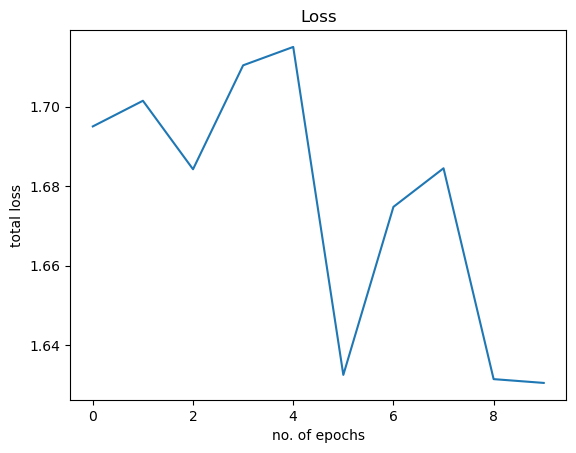

In [24]:
# You have achieved an accuracy of around 90% by training 
# the model for only 50 epochs. Accuracy can be improved 
# further if the model is trained longer.
# Let’s visualize how the graphs for loss and accuracy look like. 
# The following is the loss:

plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

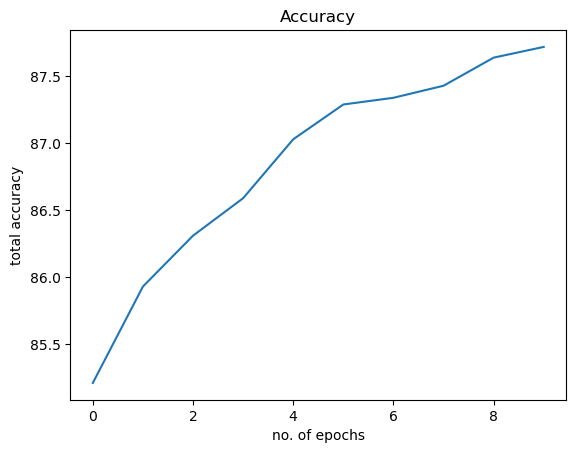

In [25]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

In [32]:
print('OUTPUTS')
print(outputs.size())
# This produces a 16x10 matrix because each iteration 
# has a batch size of 16 and each prediction across the 
# 10 classes, with the largest number indicating the likely
# number it is predicting. 

iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = log_regr(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)
    
# This would be a 1x10 matrix where the largest number 
# is what the model thinks the image is. Here we can see
# that in the tensor, position 7 has the largest number, 
# indicating the model thinks the image is 7.

OUTPUTS
torch.Size([16, 10])
OUTPUTS
tensor([5.4764e-02, 9.1365e-04, 5.1301e-02, 1.4916e-01, 8.4416e-03, 1.0926e-02,
        1.0561e-03, 9.9849e-01, 2.3869e-02, 1.9196e-01],
       grad_fn=<SliceBackward0>)


In [30]:
# Because our output is of size 16 (our batch size), 
# our prediction size would also of the size 16.
print(predicted.size())

# We are printing our prediction which as verified above,
# should be digit 1.
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = log_regr(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

torch.Size([16])
PREDICTION
tensor(7)


In [34]:
# We are trying to show what we are predicting and the
# actual values. In this case, we're predicting the 
# right value 7

iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = log_regr(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 0')
        print(labels[0])


PREDICTION
tensor(7)
LABEL SIZE
torch.Size([32])
LABEL FOR IMAGE 0
tensor(7)


In [37]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'LR_model.pkl')



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


# Reading material

1. (Important) Autograd: Automatic Differentiation https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

2. Classes in Python provide a means of data and functionality together 
    https://www.w3schools.com/python/python_classes.asp

3. Module: a file containing a set of functions you want to include in your application. Consider a module to be the same as a code library.
    https://www.w3schools.com/python/python_modules.asp

3. Details of torch.nn https://pytorch.org/docs/stable/nn.html

4. Details of torch package https://pytorch.org/docs/stable/torch.html

5. deep learning wizard https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_logistic_regression/ 

6. Epoch vs Batch Size vs Iterations https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
